### Exploratory Data Analysis

### Objective: Identify the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [65]:
### Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#### Step 1 - Data Loading

In [66]:
### Read the loan file
### We are getting a low memory warning on reading the dataset because of mixed values in 47 different columns
### Hence lets include parameter for low_memory = false
loans = pd.read_csv('loan.csv',low_memory=False,na_values='scalar')
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [67]:
### Let's take a generic look at the dataset properties
print(loans.shape)
print(loans.columns)
print(len(loans))

(39717, 111)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
39717


In [68]:
print(loans.shape)
print(loans.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [69]:
### Let's check the ID columns are unique or not
print(len(loans['id'].unique()))
print(len(loans['member_id'].unique()))
### Let's also run the check on columns for data sanity
print(loans.isnull().sum())

39717
39717
id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2458
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12939
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                         

In [70]:
### Looks like many columns have all records as null. Let's first only identify columns with all null records
### Total records in file are 39717
print(loans.columns[loans.isnull().sum()==39717])
print(len(loans.columns[loans.isnull().sum()==39717]))

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

####    ANALYSIS
###### Almost 54 columns out of 111 have all null values
###### It is easy to drop the columns with all null values but many of the columns may represent significant use case.
###### Let's analyse: The column names suggests many are calculated columns like percentage or totalsT
###### Build understanding of some of the columns using data dictionary
###### identify which can be dropped and which can be imputed from remaining 

In [71]:
### Let's identify remaining 111-54 = 57 columns which are not null to figure out imputation possibility using data from above
print(loans.columns[loans.isnull().sum() < 39717])
print(len(loans.columns[loans.isnull().sum() < 39717]))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [72]:
### Let's look at whether we have any joint loans or not
print(loans['application_type'].unique())

['INDIVIDUAL']


In [73]:
### It seems no joint loans so we can comfortably drop the columns like
###'annual_inc_joint', 'dti_joint','verification_status_joint
### Also further analysis reveals we do not have any ways to impute values by using calculation on exisiting data
### The lending club website suggests they stopped producing the remaining columns data.
### It does not make any point in imputing any values to such columns which are all null. Let's get rid of them
loans = loans[loans.columns[loans.isnull().sum() < 39717]]
print(loans.shape)

(39717, 57)


In [74]:
### Now let's concentrate our analysis on the remaining 54 columns to identify null values
###round(100*(loans.isnull().sum()/len(loans.index)), 2)
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2458
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12939
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [75]:
### It seems we still have two columns which have more than 90% null values. Let's concentrate analysis on this two columns
print(loans['mths_since_last_record'].isnull().sum())
print(loans['next_pymnt_d'].isnull().sum())
print(loans['mths_since_last_record'].dropna())

36931
38577
66       113.0
70       105.0
77        97.0
94        33.0
161       93.0
253       52.0
271      113.0
359       85.0
382       90.0
393       91.0
422      114.0
532       92.0
566      117.0
576       87.0
587       45.0
600       83.0
626       91.0
656       83.0
707      118.0
767       38.0
1081     101.0
1094      92.0
1184     100.0
1279     112.0
1282     110.0
1323     101.0
1340      88.0
1392      79.0
1393      88.0
1394     114.0
         ...  
39684      0.0
39685      0.0
39687      0.0
39689      0.0
39690      0.0
39691      0.0
39693      0.0
39694      0.0
39695      0.0
39696      0.0
39697      0.0
39698      0.0
39699      0.0
39700      0.0
39701      0.0
39702      0.0
39703      0.0
39704      0.0
39705      0.0
39706      0.0
39707      0.0
39708      0.0
39709     44.0
39710      0.0
39711      0.0
39712      0.0
39713      0.0
39714      0.0
39715      0.0
39716      0.0
Name: mths_since_last_record, Length: 2786, dtype: float64


In [76]:
### After going through data dictionary we found another column which is related to mths_since_last_record
### The pub_rec column tells us about the number of public records. Lets look at pub_rec unique values.
print(loans['pub_rec'].unique())

[0 1 2 3 4]


In [77]:
### There are only 5 unique values for pub_rec let's compare values of mths_since_last_record for all different pub_rec values
### The expectation is if there is any public record then we should have value for month but if the public record is not ther
### then there should not be any month. Lets test it.
print(loans['mths_since_last_record'][loans['pub_rec']==0].isnull().sum())
print(loans['mths_since_last_record'][loans['pub_rec']==1].isnull().sum())
print(loans['mths_since_last_record'][loans['pub_rec']==2].isnull().sum())
print(loans['mths_since_last_record'][loans['pub_rec']==3].isnull().sum())
print(loans['mths_since_last_record'][loans['pub_rec']==4].isnull().sum())
print(loans['mths_since_last_record'][loans['pub_rec']==0].unique())
print(loans['mths_since_last_record'][loans['pub_rec']==1].unique())
print(loans['mths_since_last_record'][loans['pub_rec']==2].unique())
print(loans['mths_since_last_record'][loans['pub_rec']==3].unique())
print(loans['mths_since_last_record'][loans['pub_rec']==4].unique())

36931
0
0
0
0
[ nan   0.]
[ 113.  105.   97.   33.   93.   52.   85.   90.   91.  114.   92.  117.
   87.   45.   83.  118.   38.  101.  100.  112.  110.   88.   79.   77.
  107.  102.   98.   95.  103.   96.  116.  111.   89.  108.   29.  106.
  115.   53.   86.   57.   63.   94.  109.   99.  104.   76.   28.   23.
   61.   75.   47.   82.   21.   62.   80.   67.  119.   42.   66.   58.
   22.   56.   72.   64.   50.   69.   49.   74.   35.   26.   78.   54.
   37.   73.   11.   31.   59.   32.   81.   68.   55.   39.   44.   30.
   41.   71.   70.   40.   27.   34.   43.   46.   19.   17.   25.   13.
   48.   36.   51.    7.   60.   65.    6.   18.   20.  120.  129.    5.]
[  88.   61.   44.   34.  101.   58.   12.   26.   38.   51.   70.  111.
   50.   43.  118.   57.   59.   33.   90.   92.   75.   42.   35.   56.
   72.   39.   68.   64.   36.   49.   14.   29.   96.   54.   53.   65.
   40.   67.   60.   47.]
[ 33.  58.  65.  34.  50.  51.  25.]
[ 60.  13.]


In [78]:
### Indeed the analysis turns out to be reflecting same. All NA values for mths_since_last_record column is for pub_rec ==0
### But we can see that for pub-rec==0 the months has NA and 0 both. We should ideally keep 0.
### For 0 pub_rec since values are 0 let's impute all NA values with 0 to signify month is 0 if number of public records is 0
### Also conver the type to int as while reading the .csv the system took it as float
loans['mths_since_last_record']=loans['mths_since_last_record'].fillna(value=0).astype('int64')

In [79]:
#### Now let's look at the other field 'next_pymnt_d'. The date for paying next amount should be only for those 
### accounts which are currently on going. Any completed or defaulted accounts will not have any next payment date
### Let's first verify if our assumption is correct or not
print(loans['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [80]:
print(loans['next_pymnt_d'][loans['loan_status']!='Current'].isnull().sum())
### Again the assumption is true. All the null values on next payment date are for accounts which are Fully Paid or Charged Off
### We should not impute in such scenario as it does not make any sense to impute date. Let's keep it as it is.

38577


In [81]:
### Let's look at the other high value variable with null values like mths_since_last_delinq,desc and emp_title
### Again the mths_since_last_deling signifies the number of months since last deliquency. Let's look at data
print(loans['mths_since_last_delinq'].unique())

[  nan   35.   38.   61.    8.   20.   18.   68.   45.   48.   41.   40.
   74.   25.   53.   39.   10.   26.   56.   77.   28.   52.   24.   16.
   60.   54.   23.    9.   11.   13.   65.   19.   80.   22.   59.   79.
   44.   64.   57.   14.   63.   49.   15.   73.   70.   29.   51.    5.
   75.   55.    2.   30.   47.   33.   69.    4.   43.   21.   27.   46.
   81.   78.   82.   31.   76.   62.   72.   42.   50.    3.   12.   67.
   36.   34.   58.   17.   71.   66.   32.    6.   37.    7.    1.   83.
   86.  115.   96.  103.  120.  106.   89.  107.   85.   97.   95.    0.]


In [82]:
### The 0 and NA value in the column does not make sense. We can either have NA or 0 to repesenting number of months does not exist
### This is not a quantitative column and imputing with 0 will not exaggerate the results. Let's do that
loans['mths_since_last_delinq']=loans['mths_since_last_delinq'].fillna(value=0).astype('int64')
### Lets further look at other column like emp_title. The emp_title contains title of employee or employee name
print(len(loans['emp_title'].unique()))
### The employee title may not get used as categorical as so many unique values. Let's drop it.
loans = loans.drop('emp_title', axis=1)
### Also look at some of the description values if any makes sense
print(loans['desc'])

28822
0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
5                                                      NaN
6          Borrower added on 12/18/11 > I am planning o...
7          Borrower added on 12/16/11 > Downpayment for...
8          Borrower added on 12/21/11 > I own a small h...
9          Borrower added on 12/16/11 > I'm trying to b...
10         Borrower added on 12/15/11 > I had recived a...
11                                                     NaN
12         Borrower added on 12/15/11 > Plan to pay off...
13         Borrower added on 12/19/11 > I intend to pay...
14                                                     NaN
15                                                     NaN
16                                                

In [83]:
#### The description null will not be much useful but we can extract added on date for any further analysis
#### Only few rows may have this date but it is best practice to capture such information and store it before dropping column
loans['added_on_date']=loans['desc'].str.split('>').str[0].str[20:28:]
loans['added_on_date']=pd.to_datetime(loans['added_on_date'],errors='coerce')
loans = loans.drop('desc', axis=1)

In [84]:
#### Check again for remaining null columns
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record      

In [85]:
### Again now we can ignore the added on date and next payment date. Lets look at title,revol_util,collections_12_mths_ex_med,
### chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens and last_pymnt_d
print(len(loans['title'].unique()))
### Again not much use of title column lot of unique values cannot be used as categorical value
loans = loans.drop('title', axis=1)
## Lets look at other variables for the unique values in them
### It is easy to drop all variables based on a condition for number of unique values 
### Suggested way to look at each and then drop individual or all together in one shot
print(loans['collections_12_mths_ex_med'].unique())
print(loans['chargeoff_within_12_mths'].unique())
print(loans['pub_rec_bankruptcies'].unique())
print(loans['tax_liens'].unique())
print(loans['policy_code'].unique())
print(loans['application_type'].unique())
print(loans['acc_now_delinq'].unique())
print(loans['delinq_amnt'].unique())

19617
[  0.  nan]
[  0.  nan]
[  0.   1.   2.  nan]
[  0.  nan]
[1]
['INDIVIDUAL']
[0]
[0]


In [86]:
### Most of the above columns has either 0 or NA value. 
### After looking at data dictionary it does not make any business sense to keep most of this columns
### Lets drop them and for pub_rec_bankruptcies impute NA with 0 as 0 can be a better indicator
loans = loans.drop('collections_12_mths_ex_med', axis=1)
loans = loans.drop('chargeoff_within_12_mths', axis=1)
loans = loans.drop('tax_liens', axis=1)
loans = loans.drop('policy_code', axis=1)
loans = loans.drop('application_type', axis=1)
loans = loans.drop('acc_now_delinq', axis=1)
loans = loans.drop('delinq_amnt', axis=1)
#### Impute the pub_rec_bankruptcies NA value with 0
loans['pub_rec_bankruptcies']=loans['pub_rec_bankruptcies'].fillna(value=0).astype('int64')


In [87]:
### So we are good in terms of keeping values Null in revolv_util as no way to calculate the utilization
### Similarly let the last payment date be null for time being. No point in dropping the null records.
### Lets also do a data type check
print(loans.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line                  

In [88]:
### Let's modify the datatypes for percentage columns by removin % sign and dividing by 100 to keep it as a float
loans['int_rate']=round((loans['int_rate'].str.split('%').str[0]).astype(float)/100,3)
loans['revol_util']=round((loans['revol_util'].str.split('%').str[0]).astype(float)/100,3)
### Also lets use the issue_date month and year and create seperate columns for analysis
loans['issued_month']=loans['issue_d'].str.split('-').str[0]
loans['issued_year']=('20'+(loans['issue_d'].str.split('-').str[1]))
### Also do outlier treatement
# check the quantile of the annual_inc
print(loans['annual_inc'].quantile(np.linspace(.1, 1, 9, 0)))
print(loans['annual_inc'].quantile(0.96))
loans = loans[loans['annual_inc'] < loans['annual_inc'].quantile(0.96)]

0.1     30000.0
0.2     37500.0
0.3     45000.0
0.4     50400.0
0.5     59000.0
0.6     65844.4
0.7     75600.0
0.8     90000.0
0.9    116000.0
Name: annual_inc, dtype: float64
150000.0


### STEP 3: ANALYSIS

##### The univariate analysis, univariate segmented and bivariate analysis should be done on all different aspects of data

In [89]:
### Let's start the analysis. Our first step should be to understand how many loans are defaulted.
### What was the amount in default. What is the amount in current and paid.
### total No. of default loan accounts, current loan account and paid loan account and there % of totals
### By looking at the loan_amount and funded_amount it makes sense to use funded amount for our analysis.
### The funded amount is the amount which the lending company has lended to the borrower
print(loans.set_index('loan_status').groupby(level=0)['funded_amnt'].agg(['count','sum',np.mean,np.median,np.max,np.min]))
print(loans.set_index('loan_status').groupby(level=0)['funded_amnt'].agg(['count','sum']).apply(lambda x: 100 * x / float(x.sum())))
print(loans['funded_amnt'].describe())

             count        sum          mean  median   amax  amin
loan_status                                                     
Charged Off   5438   62567700  11505.645458   10000  35000   900
Current       1058   16927650  15999.669187   15000  35000  1000
Fully Paid   31430  323283675  10285.831212    9000  35000   500
                 count        sum
loan_status                      
Charged Off  14.338449  15.534002
Current       2.789643   4.202714
Fully Paid   82.871908  80.263285
count    37926.000000
mean     10620.129331
std       6921.749821
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14750.000000
max      35000.000000
Name: funded_amnt, dtype: float64


### First Step Analysis
#### So based on the amount/count and percentage we have very less current accounts followed by default.
#### Most of the historical data is concentrated towards fully paid accounts.There are no rejected loan details which is a problem
#### which is termed as Reject Interference.
#### Also the funded amount clearly indicates that the mean is biased also the difference between 25 and 75 percentile is big
#### Let's focus on using median of funded amount for further analysis

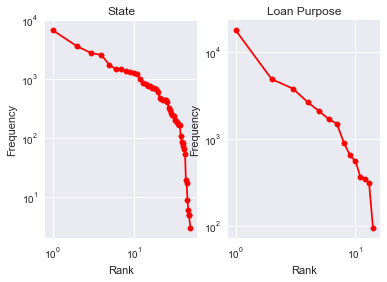

In [90]:
### Let's start looking at some unordered variables and see how they are represent on power-law distribution
### First to start with Address State & Loan Purppose
x=loans.set_index('addr_state').groupby(level=0)['id'].agg(['count']).sort_values(by=('count'),ascending=False)
x['rank']=x['count'].rank(ascending=False,method='min')
z=loans.set_index('purpose').groupby(level=0)['id'].agg(['count']).sort_values(by=('count'),ascending=False)
z['rank']=z['count'].rank(ascending=False,method='min')
plt.subplot(1,2,1)
plt.scatter(x['rank'], x['count'],color='red',s=30)
plt.plot(x['rank'], x['count'],'-r')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('State')
plt.xscale('log')
plt.yscale('log')
plt.subplot(1,2,2)
plt.scatter(z['rank'], z['count'],color='red',s=30)
plt.plot(z['rank'], z['count'],'-r')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Loan Purpose')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### The above power distribution plots between unordered categorical of state and purpose indicates
#### that they follow power law distribution

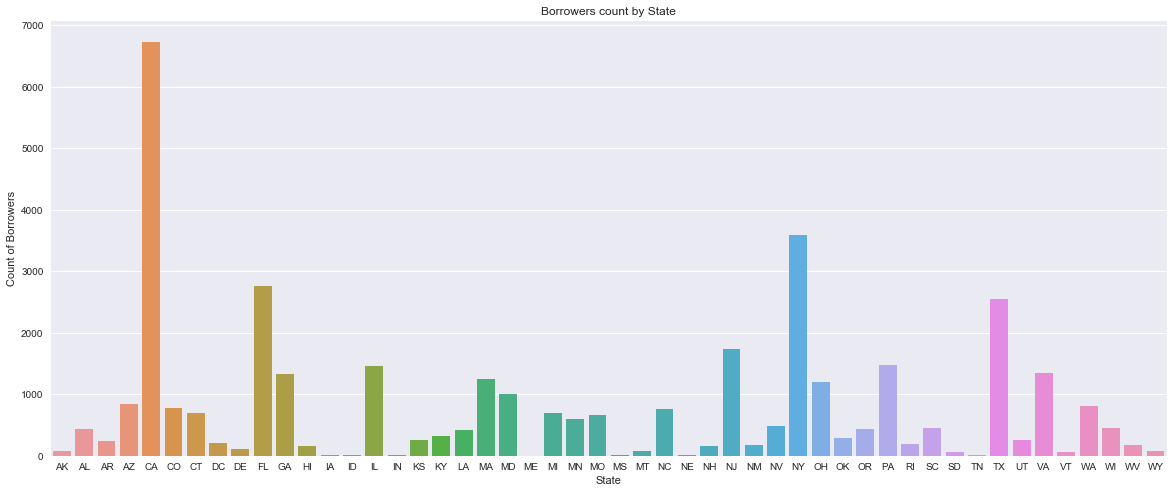

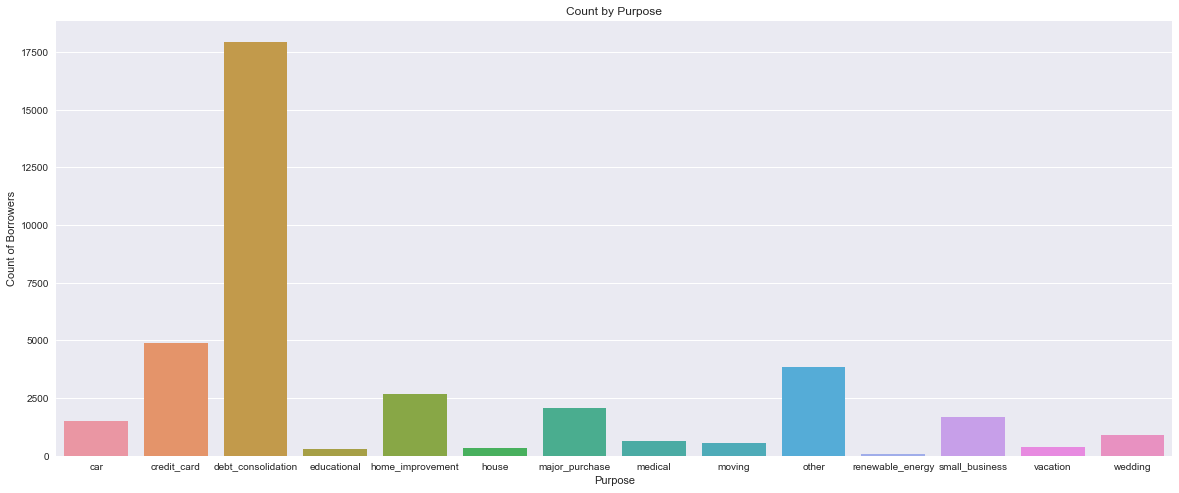

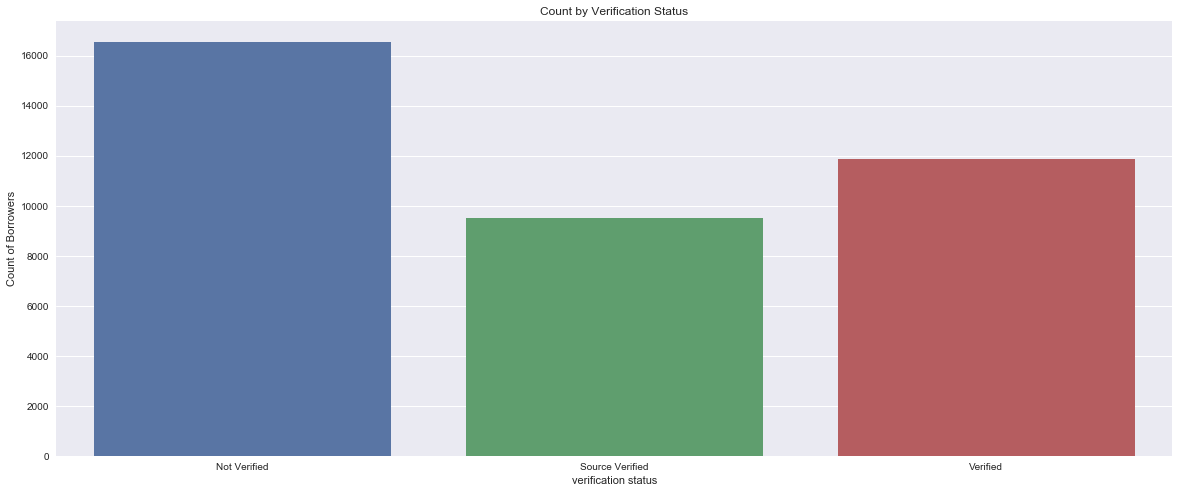

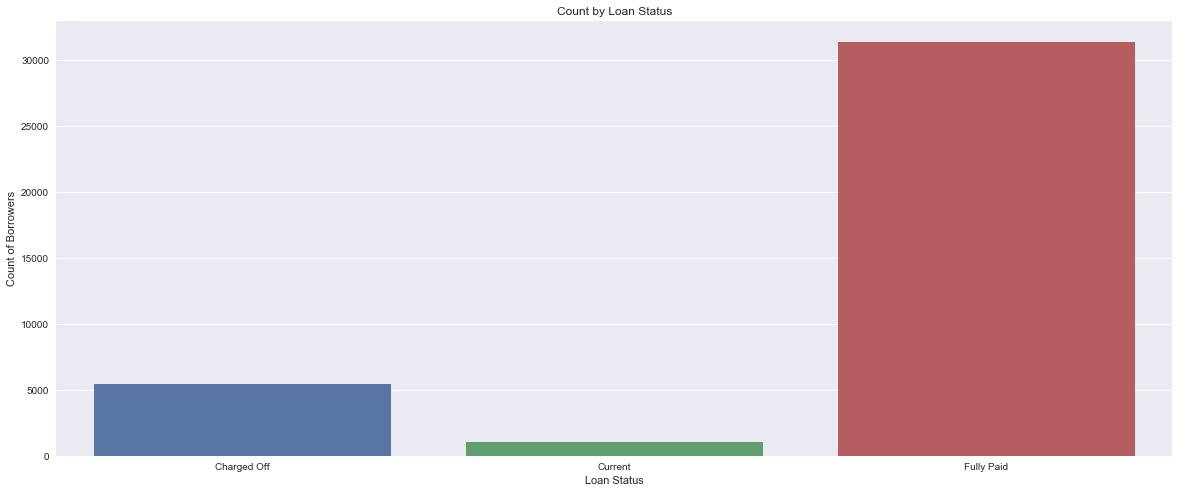

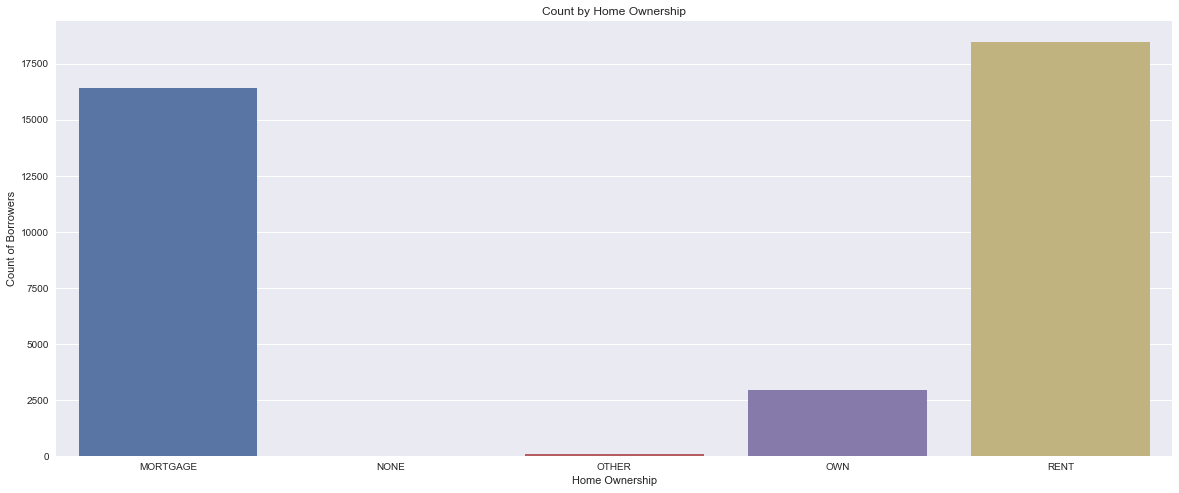

In [91]:
### Lets looks at some unordered categorical variables based on number of records.
x=loans.set_index('addr_state').groupby(level=0)['id'].agg(['count'])
x=x.reset_index()
z=loans.set_index('purpose').groupby(level=0)['id'].agg(['count'])
z=z.reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='addr_state', y='count', data=x,ax=ax)
plt.title('Borrowers count by State')
plt.xlabel('State')
plt.ylabel('Count of Borrowers')
plt.show()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='purpose', y='count', data=z, ax=ax)
plt.title('Count by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count of Borrowers')
plt.show()
x=loans.set_index('verification_status').groupby(level=0)['id'].agg(['count'])
x=x.reset_index()
z=loans.set_index('loan_status').groupby(level=0)['id'].agg(['count'])
z=z.reset_index()
y=loans.set_index('home_ownership').groupby(level=0)['id'].agg(['count'])
y=y.reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='verification_status', y='count', data=x,ax=ax)
plt.title('Count by Verification Status')
plt.xlabel('verification status')
plt.ylabel('Count of Borrowers')
plt.show()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='loan_status', y='count', data=z, ax=ax)
plt.title('Count by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count of Borrowers')
plt.show()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='home_ownership', y='count', data=y,ax=ax)
plt.title('Count by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count of Borrowers')
plt.show()

### Inferences from the above Bar Plots
#### 1.) The lending companies most of the customer base is from California followed by Newyork and Texas
#### 2.) The maximum no. of customer have taken loan for debt consolidation followed by for payment of credit cards
#### 3.) The maximum no. of customers are from non-verified income category followed by verified and source verified
#### 4.) The maximum no. of customers have fully paid the loans followed by defaulters and then by current active customers
#### 5.) The maximum no. of customers are rented customers followed by ones who have mortgaged their homes and few others who                own

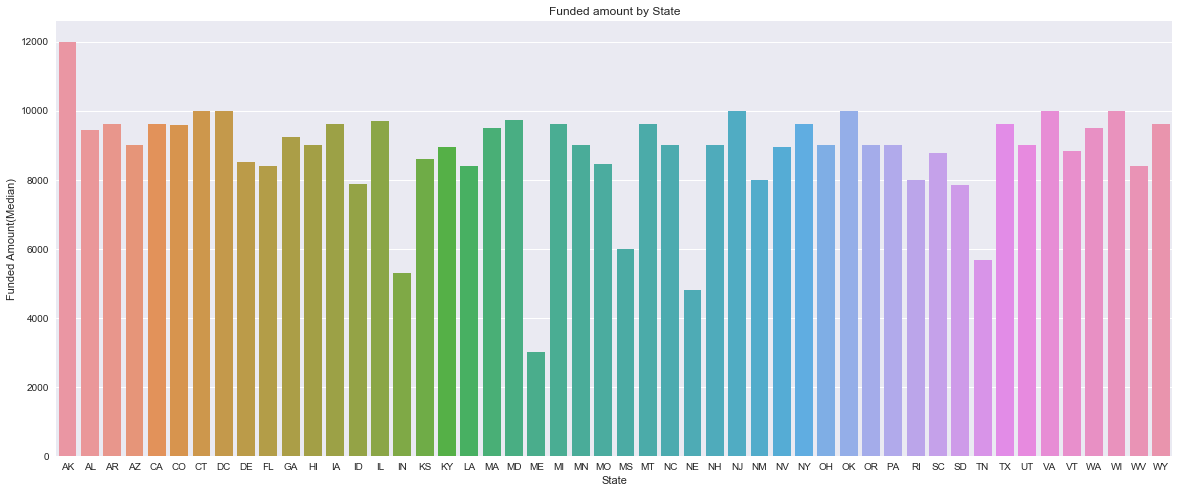

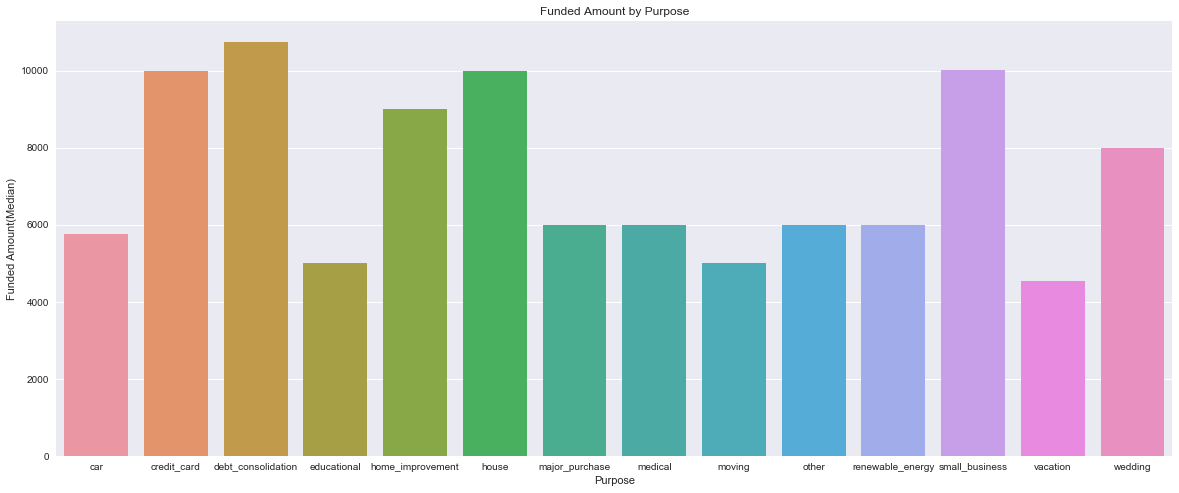

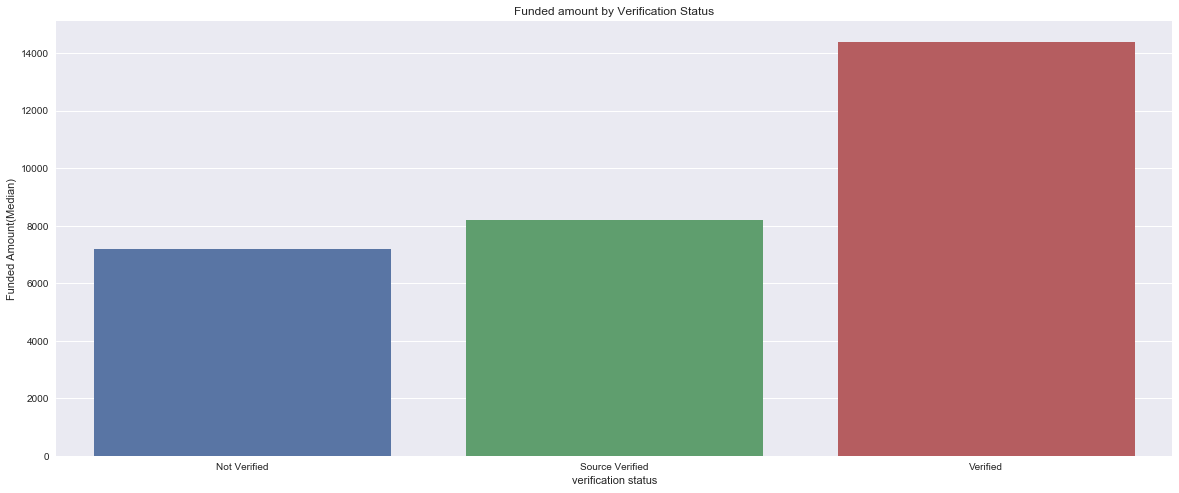

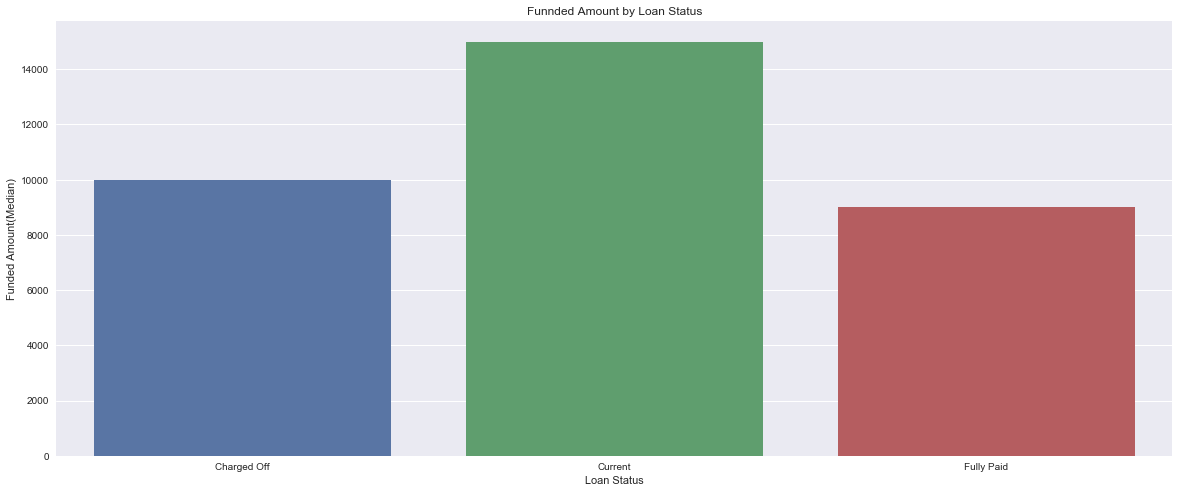

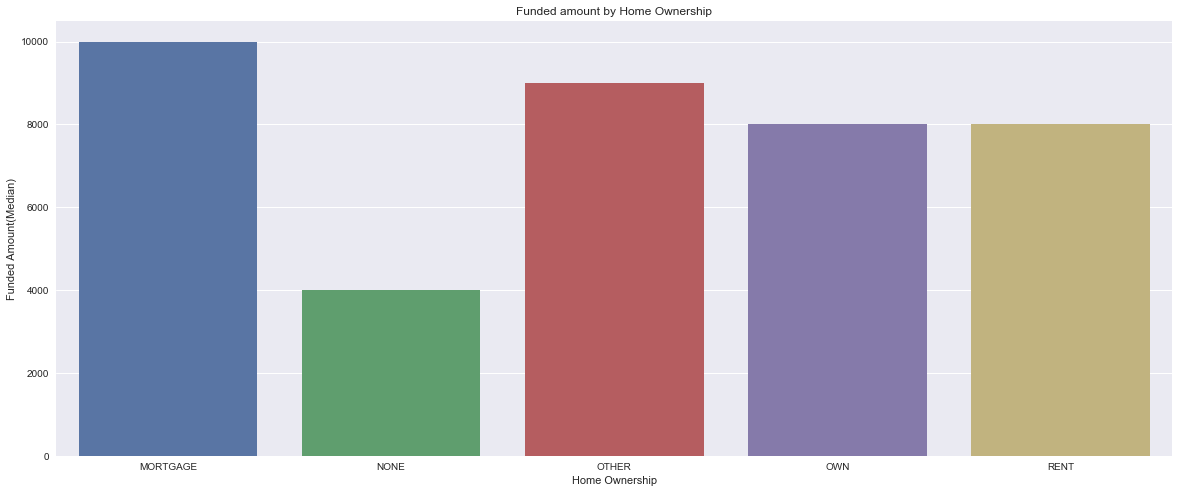

In [92]:
### Lets looks at some unordered categorical variables based on true representation of funding amount.
x=loans.set_index('addr_state').groupby(level=0)['funded_amnt'].agg([np.median])
x=x.reset_index()
z=loans.set_index('purpose').groupby(level=0)['funded_amnt'].agg([np.median])
z=z.reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='addr_state', y='median', data=x,ax=ax)
plt.title('Funded amount by State')
plt.xlabel('State')
plt.ylabel('Funded Amount(Median)')
plt.show()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='purpose', y='median', data=z, ax=ax)
plt.title('Funded Amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Funded Amount(Median)')
plt.show()
x=loans.set_index('verification_status').groupby(level=0)['funded_amnt'].agg([np.median])
x=x.reset_index()
z=loans.set_index('loan_status').groupby(level=0)['funded_amnt'].agg([np.median])
z=z.reset_index()
y=loans.set_index('home_ownership').groupby(level=0)['funded_amnt'].agg([np.median])
y=y.reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='verification_status', y='median', data=x,ax=ax)
plt.title('Funded amount by Verification Status')
plt.xlabel('verification status')
plt.ylabel('Funded Amount(Median)')
plt.show()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='loan_status', y='median', data=z, ax=ax)
plt.title('Funnded Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount(Median)')
plt.show()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='home_ownership', y='median', data=y,ax=ax)
plt.title('Funded amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Funded Amount(Median)')
plt.show()

### Inferences from the above Bar Plots
#### 1.) Alaska state AK has highest average of funded amount
#### 2.) Small Business followed by Debt consolidation and credit card has highest average of funded amount by purpose.
#### 3.) The highest average of funded amount is in verified income category followed by source verified and not verified.
#### 4.) The highest average of funded amount is in current loans followed by charged off and fully paid.
#### 5.) The highest average of funded amount is with customers with home as mortgaged followed by others. The owner and rented
#### category has almost equal average of funded amount.

### Combining the analysis from above:
#### 1.) Though maximum customer who apply for loan are from california the highest of funding is for customers from Alaska.
####       Many customers from California apply for loan but maximum is funded to ones from Alaska.
#### 2.) Though maximum number of customers have taken loan for debt consolidation and for credit card. The average of 
####       funding is highest for Small Business followed by Debt consolidation and credit card. This means that though the number of
####       customer who have applied for small business loans is less but they are the ones who have take maximum in loans.
#### 3.) The maximum number of customers are from non-verified income category but the LC company has despensed higher
####       amount of funds to only verified income category which is in one sense good. 
#### 4.) The maximum number of customers are staying in rented house but the LC company has despensed higher amount of funds
####       to ones which have mortgaged homes

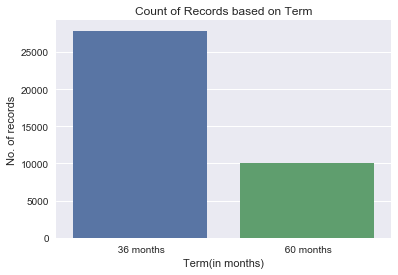

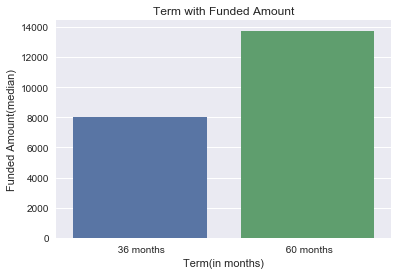

In [93]:
### Lets move further and look at some ordered categorical variable and see how they represent on bar charts
z=loans.set_index('term').groupby(level=0)['id'].agg(['count'])
z=z.reset_index()
l=loans.set_index('term').groupby(level=0)['funded_amnt'].agg([np.median])
l=l.reset_index()
sns.barplot(x='term', y='count', data=z)
plt.title('Count of Records based on Term')
plt.xlabel('Term(in months)')
plt.ylabel('No. of records')
plt.show()
sns.barplot(x='term', y='median', data=l)
plt.title('Term with Funded Amount')
plt.xlabel('Term(in months)')
plt.ylabel('Funded Amount(median)')
plt.show()

### Inference from above plots
#### 1.) The maximum number of loans are issued for 36 months term but highest average is for 60 months. It makes sense      because people tend to take higher loans for longer terms

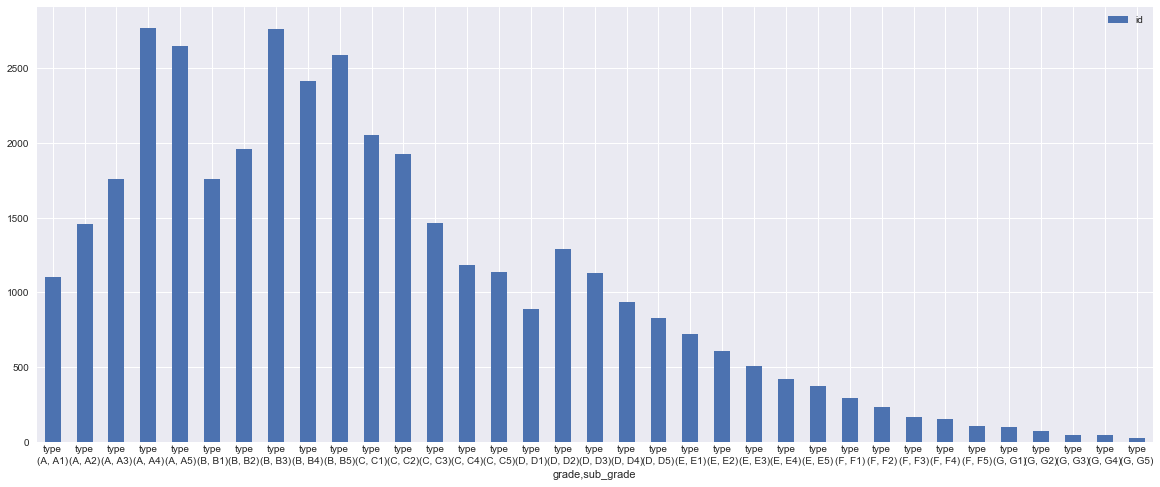

In [94]:
k=loans.groupby(['grade','sub_grade']).agg({'id':'count'})
k=k.reset_index()
k.plot.bar(x=['grade','sub_grade'],y=['id'],figsize=(20,8))
ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)
ax.set_xticks(pos,minor=True)
ax.set_xticklabels(lab,minor=True)
ax.tick_params(axis='x', which='major', pad=15, size=0)
plt.setp(ax.get_xticklabels(), rotation=0)
plt.show()

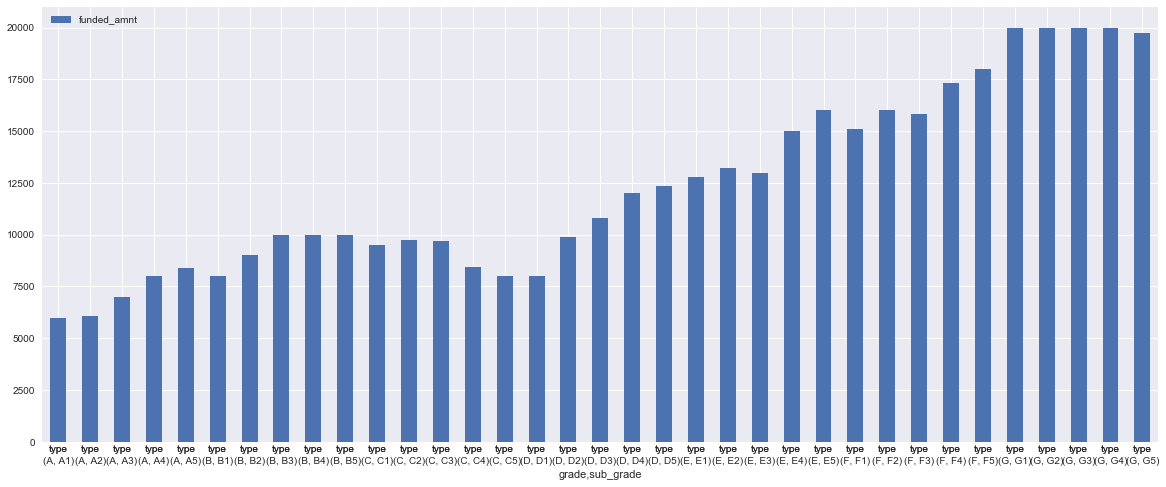

In [95]:

m=loans.groupby(['grade','sub_grade']).agg({'funded_amnt':np.median})
m=m.reset_index()
m.plot.bar(x=['grade','sub_grade'],y=['funded_amnt'],figsize=(20,8))
ax = plt.gca()
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)
ax.set_xticks(pos,minor=True)
ax.set_xticklabels(lab,minor=True)
ax.tick_params(axis='x', which='major', pad=15, size=0)
plt.setp(ax.get_xticklabels(), rotation=0)
plt.show()

### Inferences
#### The above two plots talk about the distribution from grade and sub grade prospective. We know after reading the FAQ's
####  on the lending club that grade defines Loan Grade and it is ordered from A to G. The A being one with lower intrest rate
####  this may be because of customers credit history and G being the highest interest rate again based on credit history.
#### 1.) The plot shows that though the maximum concentration of customers are from B and A grade because of lower intrest rates
####       the highest average is around the grade G. The LC has funded hightest average amount with higher interest. It clearly
####       shows the aspect of profitability. Also less people have taken bigger loans with higher intrest rates.


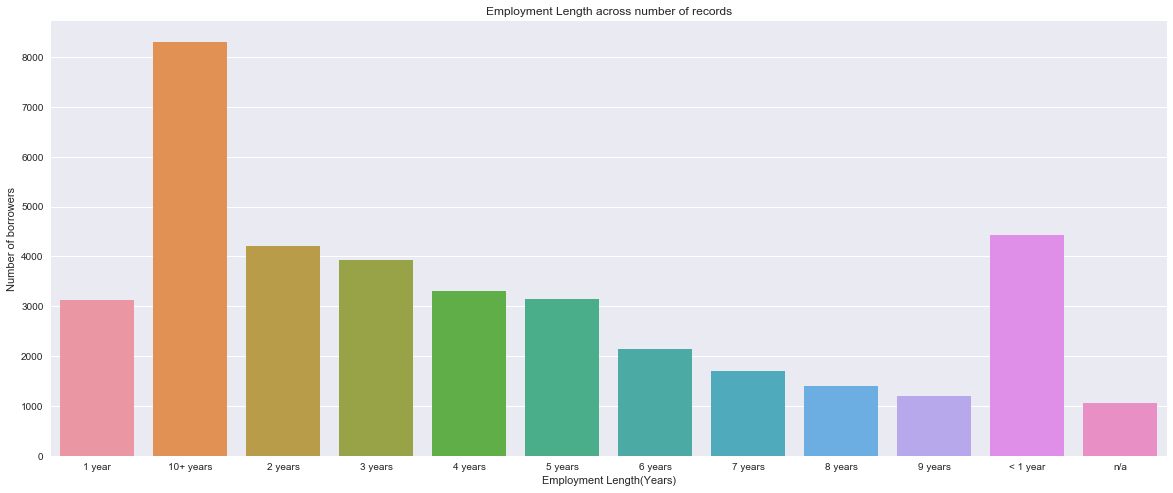

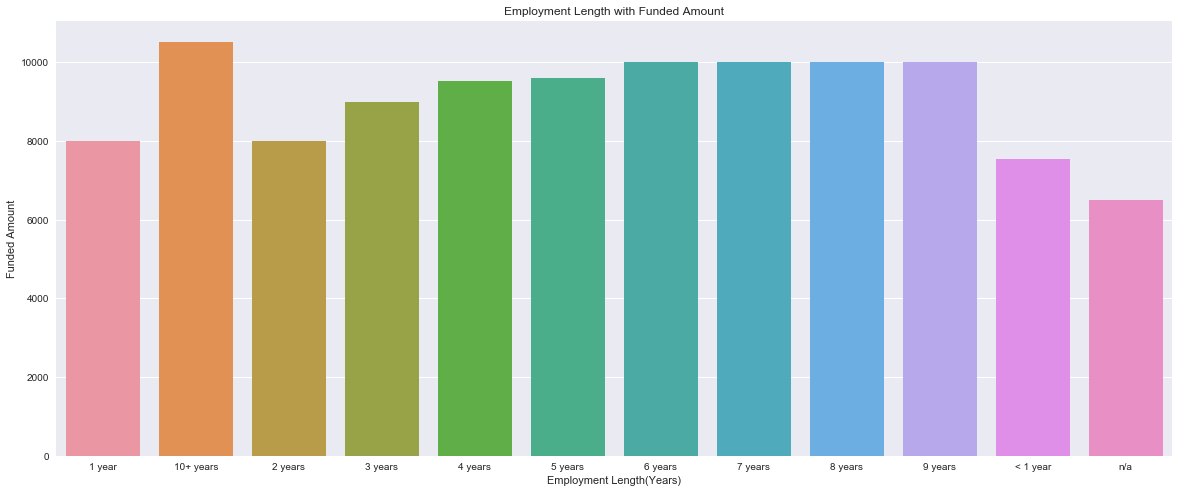

In [96]:
j=loans.set_index('emp_length').groupby(level=0)['id'].agg(['count'])
j=j.reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='emp_length', y='count', data=j,ax=ax)
plt.title('Employment Length across number of records')
plt.xlabel('Employment Length(Years)')
plt.ylabel('Number of borrowers')
plt.show()
j=loans.set_index('emp_length').groupby(level=0)['funded_amnt'].agg([np.median])
j=j.reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='emp_length', y='median', data=j,ax=ax)
plt.title('Employment Length with Funded Amount')
plt.xlabel('Employment Length(Years)')
plt.ylabel('Funded Amount')
plt.show()

### Inference
#### 1.) Again we can see from above bar plots that the maximum number of customer are employed for more than 10 years but we can  also see that the second highest are the ones with less than a year experience. The people with less number of years in job requires higher financial support.
#### 2.) Again we can see from above bar plots that the highest average of funding is done for customer who are employed for more ####      than 10 years but we canaslo see that the average is common across from 5 - 9 years. Also the average is good for customers with less that 1 year



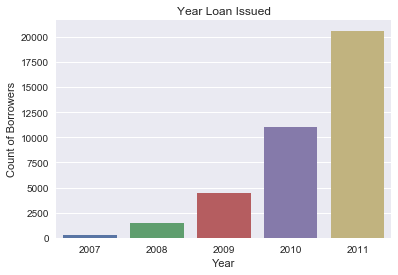

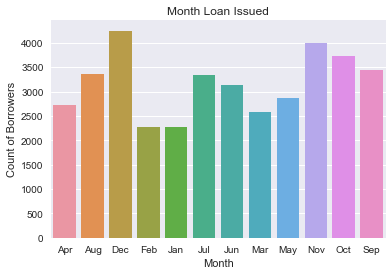

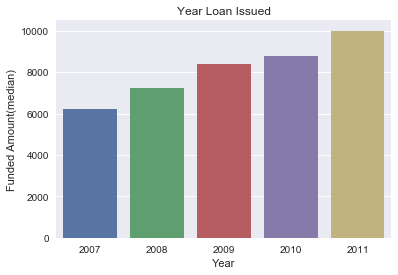

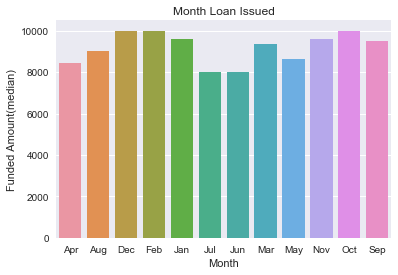

In [97]:
j=loans.set_index('issued_year').groupby(level=0)['id'].agg(['count'])
j=j.reset_index()
sns.barplot(x='issued_year', y='count', data=j)
plt.title('Year Loan Issued')
plt.xlabel('Year')
plt.ylabel('Count of Borrowers')
plt.show()
j=loans.set_index('issued_month').groupby(level=0)['id'].agg(['count'])
j=j.reset_index()
sns.barplot(x='issued_month', y='count', data=j)
plt.title('Month Loan Issued')
plt.xlabel('Month')
plt.ylabel('Count of Borrowers')
plt.show()
j=loans.set_index('issued_year').groupby(level=0)['funded_amnt'].agg([np.median])
j=j.reset_index()
sns.barplot(x='issued_year', y='median', data=j)
plt.title('Year Loan Issued')
plt.xlabel('Year')
plt.ylabel('Funded Amount(median)')
plt.show()
j=loans.set_index('issued_month').groupby(level=0)['funded_amnt'].agg([np.median])
j=j.reset_index()
sns.barplot(x='issued_month', y='median', data=j)
plt.title('Month Loan Issued')
plt.xlabel('Month')
plt.ylabel('Funded Amount(median)')
plt.show()

### Inference
#### 1.) The maximum loans are issued in 2011 and same is with the average of loans funded. The numbers of loans are less for other years but average of 2009 and 2010 is almost same. That means despite the numbers being long in terms of amount the funding was good in those two years.
#### 2.) The same goes with month lookup. The maximum loans are issued in Dec but the funding average was same for Feb and Jan. This means higher amounts were funded in Feb and Jan.

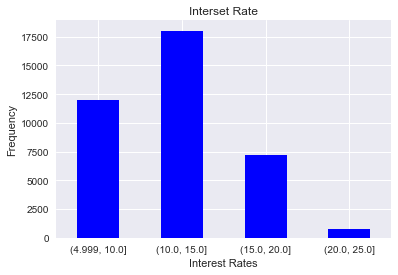

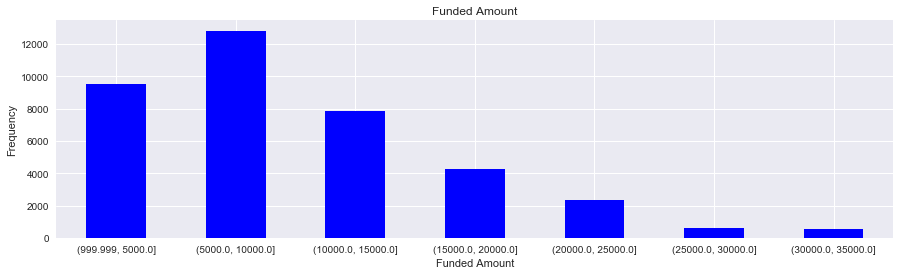

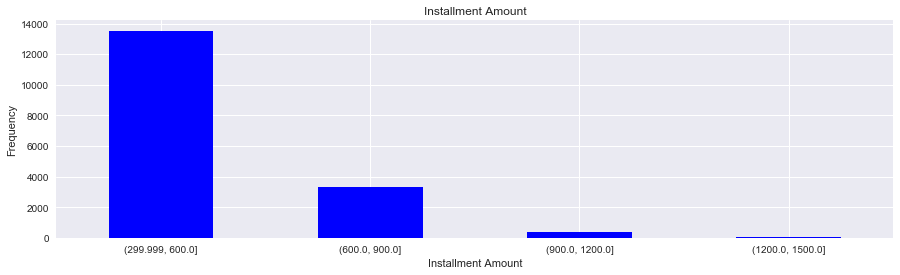

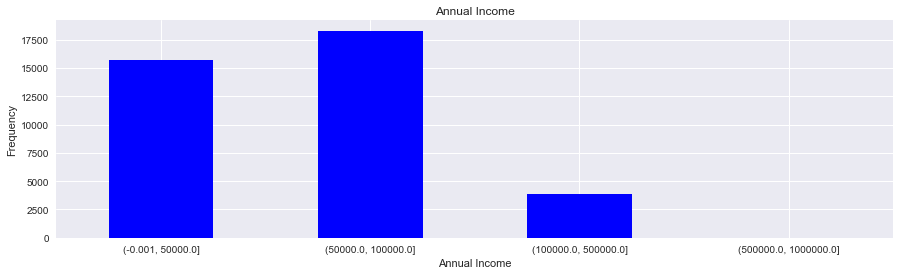

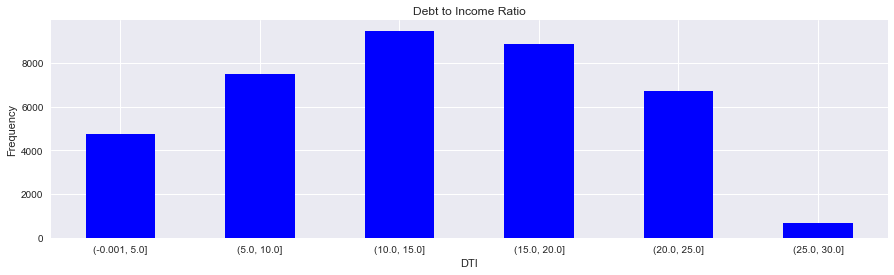

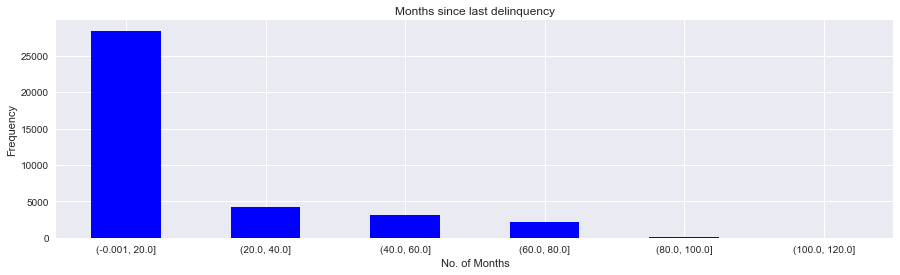

In [98]:
### Lets do some binning and see how the data is represented
out = pd.cut(loans['int_rate'] * 100, bins=[5, 10, 15, 20, 25], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.ylabel("Frequency")
plt.xlabel("Interest Rates")
plt.title("Interset Rate")
plt.show()
out = pd.cut(loans['funded_amnt'], bins=[1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.ylabel("Frequency")
plt.xlabel("Funded Amount")
plt.title("Funded Amount")
plt.show()
out = pd.cut(loans['installment'], bins=[300, 600, 900, 1200, 1500], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.ylabel("Frequency")
plt.xlabel("Installment Amount")
plt.title("Installment Amount")
plt.show()
out = pd.cut(loans['annual_inc'], bins=[0,50000,100000,500000,1000000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.ylabel("Frequency")
plt.xlabel("Annual Income")
plt.title("Annual Income")
plt.show()
out = pd.cut(loans['dti'], bins=[0,5,10,15,20,25,30], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.ylabel("Frequency")
plt.xlabel("DTI")
plt.title("Debt to Income Ratio")
plt.show()
out = pd.cut(loans['mths_since_last_delinq'], bins=[0,20,40,60,80,100,120], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
plt.ylabel("Frequency")
plt.xlabel("No. of Months")
plt.title("Months since last delinquency")
plt.show()

### Inference
#### The abover graphs speaks for itself no specific justification is required. The maximum records are in funding range of 5000-1000 with intrest rate of 10-15% range. The range of installements is between 300 to 600. The DTI is very important indicator and industry best practice is to keep it below 30%. In that terms the DTI is well contained with maximum being in the range of 10-15%.

In [99]:
#### Let's do some comparision of averages across loan status. In fact lets use median to do that:
print(loans.groupby(['loan_status']).agg({'funded_amnt':np.median,'annual_inc':np.median,'revol_bal':np.median,'total_pymnt':np.median}))

             funded_amnt  annual_inc  revol_bal   total_pymnt
loan_status                                                  
Charged Off        10000     52000.0     8951.5   4736.545000
Current            15000     61000.0    12076.5  19752.935000
Fully Paid          9000     57500.0     8452.5  10360.949395


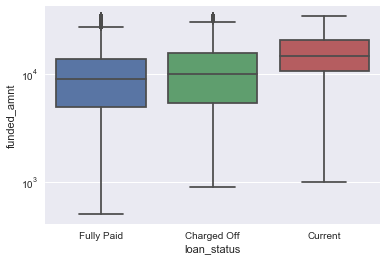

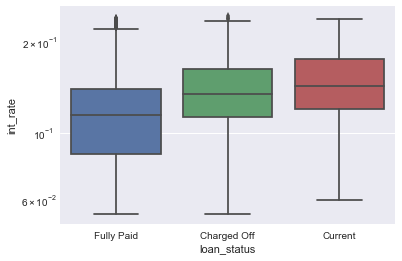

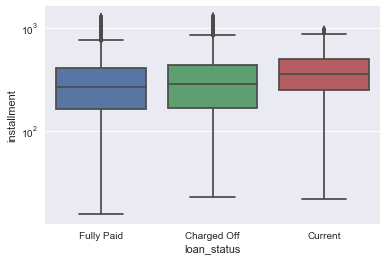

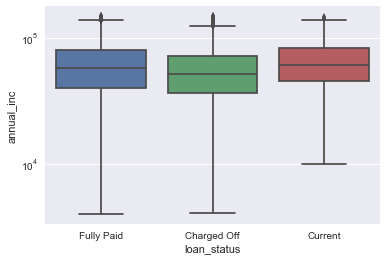

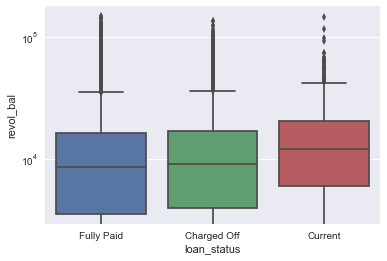

In [100]:
#### Lets evaluate some quantitative variables against the loan status
sns.boxplot(x='loan_status', y='funded_amnt', data=loans)
plt.yscale('log')
plt.show()
sns.boxplot(x='loan_status', y='int_rate', data=loans)
plt.yscale('log')
plt.show()
sns.boxplot(x='loan_status', y='installment', data=loans)
plt.yscale('log')
plt.show()
sns.boxplot(x='loan_status', y='annual_inc', data=loans)
plt.yscale('log')
plt.show()
sns.boxplot(x='loan_status', y='revol_bal', data=loans)
plt.yscale('log')
plt.show()

### Inference
#### 1.) The above box plots shows the trend of how median is increasing for all the above plots. The lower being at for the fully paid then charged off and current. The trend is clearly indicating that the interest rates, installament amount is on higher side for current loans. Though the annual income is also higher for customer who are currenly active but revolving balance is also higher. The higher median and average of loan status current shows that there may be likely chances of people being defaulting because of higher revolving balance and higher intrest rate. The installment amount is also higher.
#### 2.) We should suggest the LC company to look in to it and see how they can bring the current account holders interst rates and in that way the installament amount closer to other averages.


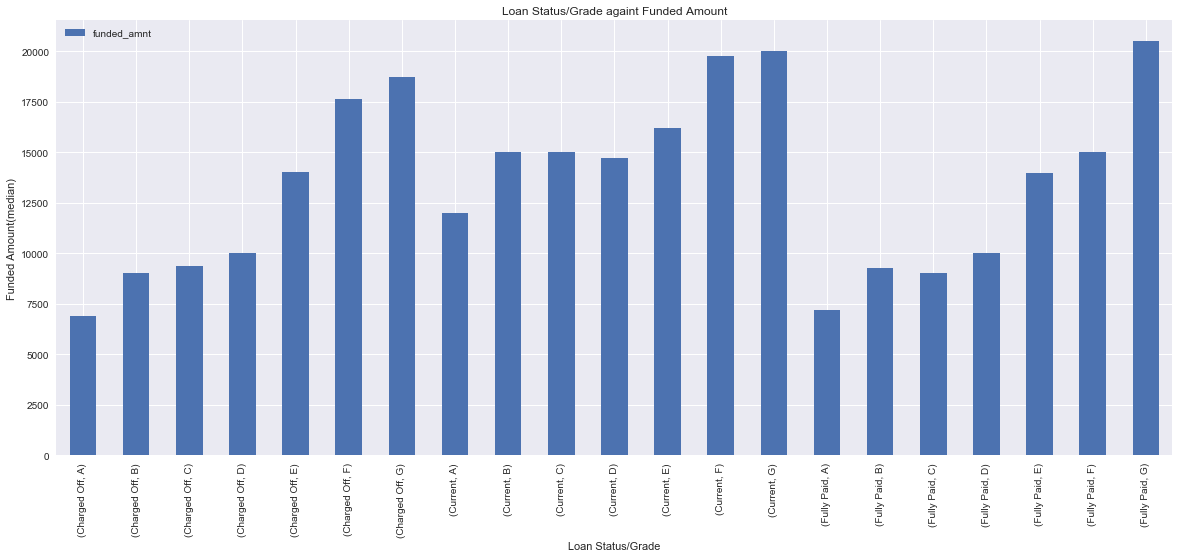

In [101]:
### Lets do some bivariate analysis to see the trends.
k=loans.groupby(['loan_status','grade']).agg({'funded_amnt':np.median})
k=k.reset_index()
k.plot.bar(x=['loan_status','grade'],y=['funded_amnt'],figsize=(20,8))
plt.ylabel("Funded Amount(median)")
plt.xlabel("Loan Status/Grade")
plt.title("Loan Status/Grade againt Funded Amount")
plt.show()

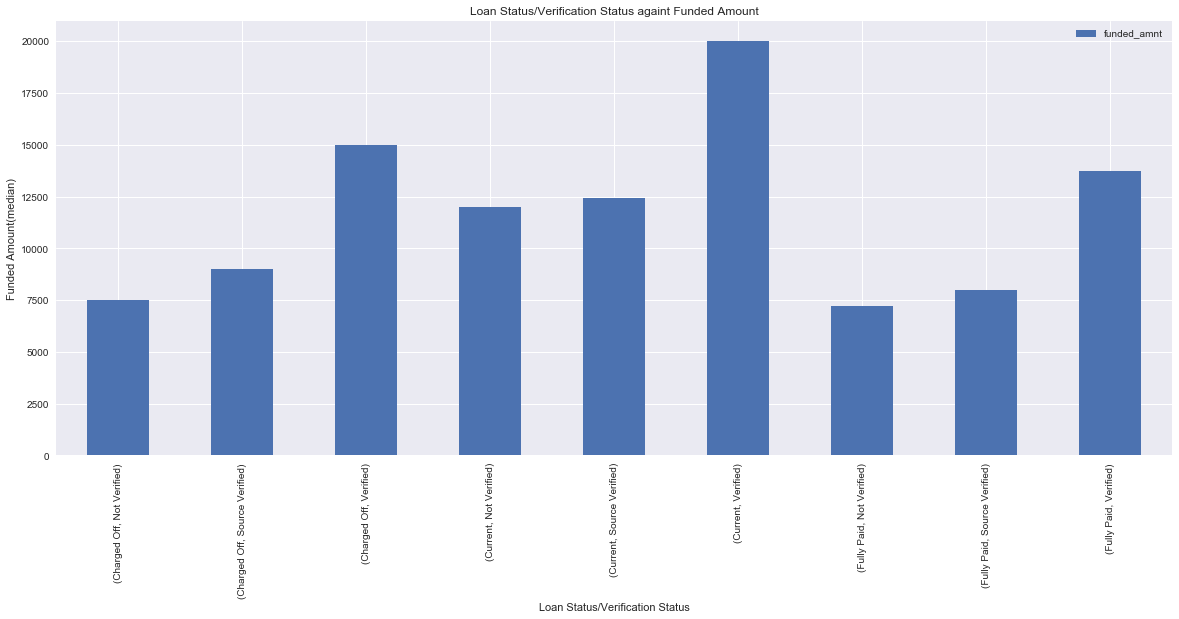

In [102]:
k=loans.groupby(['loan_status','verification_status']).agg({'funded_amnt':np.median})
k=k.reset_index()
k.plot.bar(x=['loan_status','verification_status'],y=['funded_amnt'],figsize=(20,8))
plt.ylabel("Funded Amount(median)")
plt.xlabel("Loan Status/Verification Status")
plt.title("Loan Status/Verification Status againt Funded Amount")
plt.show()

In [103]:
df = pd.DataFrame()
df['loan_status']=loans['loan_status']
df['funded_amnt']=loans['funded_amnt']
df['mths_since_last_delinq']=loans['mths_since_last_delinq']
df['bins']=pd.cut(loans['mths_since_last_delinq'], bins=[0,20,40,60,80,100,120], include_lowest=True)

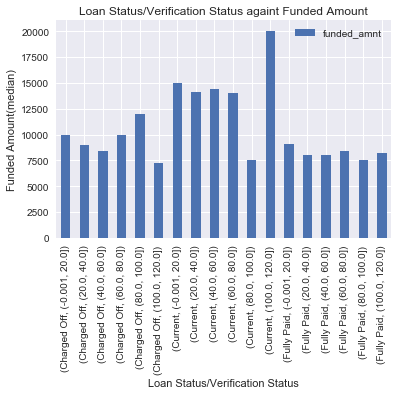

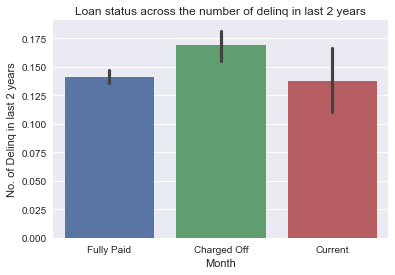

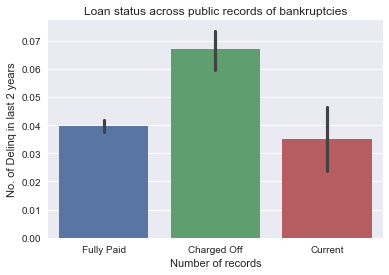

In [104]:
k=df.groupby(['loan_status','bins']).agg({'funded_amnt':np.median})
k=k.reset_index()
k.plot.bar(x=['loan_status','bins'],y=['funded_amnt'])
plt.ylabel("Funded Amount(median)")
plt.xlabel("Loan Status/Verification Status")
plt.title("Loan Status/Verification Status againt Funded Amount")
plt.show()
sns.barplot(x='loan_status', y='delinq_2yrs', data=loans)
plt.title('Loan status across the number of delinq in last 2 years')
plt.xlabel('Month')
plt.ylabel('No. of Delinq in last 2 years')
plt.show()
sns.barplot(x='loan_status', y='pub_rec_bankruptcies', data=loans)
plt.title('Loan status across public records of bankruptcies')
plt.xlabel('Number of records')
plt.ylabel('No. of Delinq in last 2 years')
plt.show()

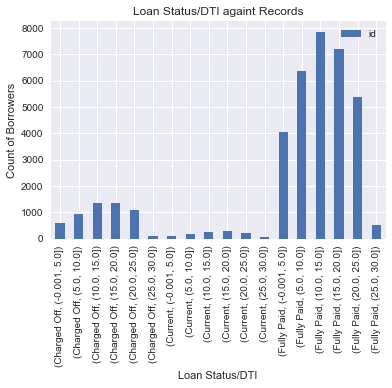

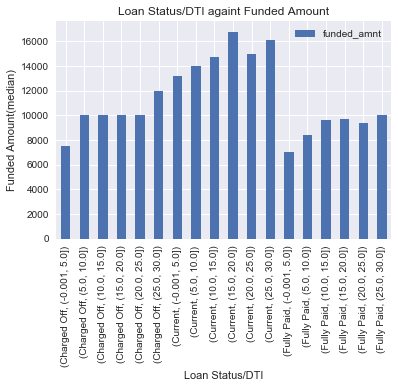

In [105]:
df = pd.DataFrame()
df['loan_status']=loans['loan_status']
df['id']=loans['id']
df['dti']=loans['dti']
df['bins']=pd.cut(loans['dti'], bins=[0,5,10,15,20,25,30], include_lowest=True)
k=df.groupby(['loan_status','bins']).agg({'id':'count'})
k=k.reset_index()
k.plot.bar(x=['loan_status','bins'],y=['id'])
plt.ylabel("Count of Borrowers")
plt.xlabel("Loan Status/DTI")
plt.title("Loan Status/DTI againt Records")
plt.show()
df = pd.DataFrame()
df['loan_status']=loans['loan_status']
df['funded_amnt']=loans['funded_amnt']
df['dti']=loans['dti']
df['bins']=pd.cut(loans['dti'], bins=[0,5,10,15,20,25,30], include_lowest=True)
k=df.groupby(['loan_status','bins']).agg({'funded_amnt':np.median})
k=k.reset_index()
k.plot.bar(x=['loan_status','bins'],y=['funded_amnt'])
plt.ylabel("Funded Amount(median)")
plt.xlabel("Loan Status/DTI")
plt.title("Loan Status/DTI againt Funded Amount")
plt.show()

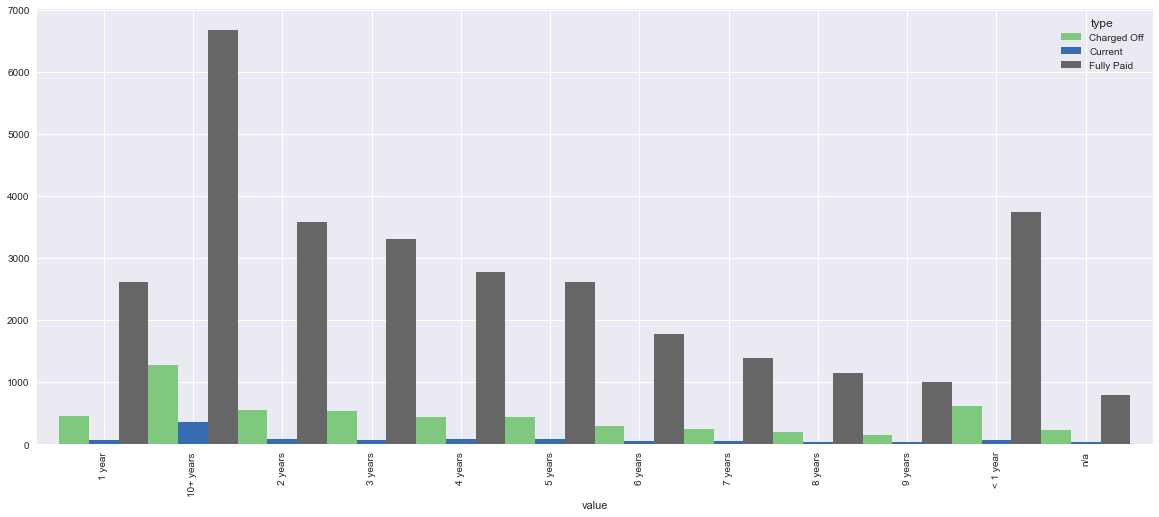

In [106]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['emp_length'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,ax=ax)
plt.show()

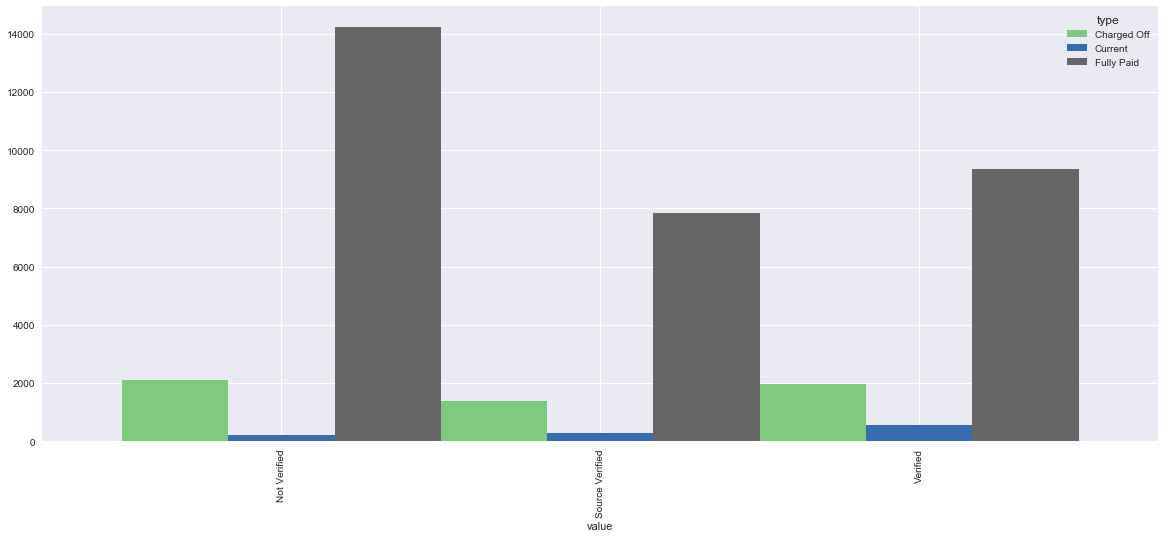

In [107]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['verification_status'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,ax=ax)
plt.show()

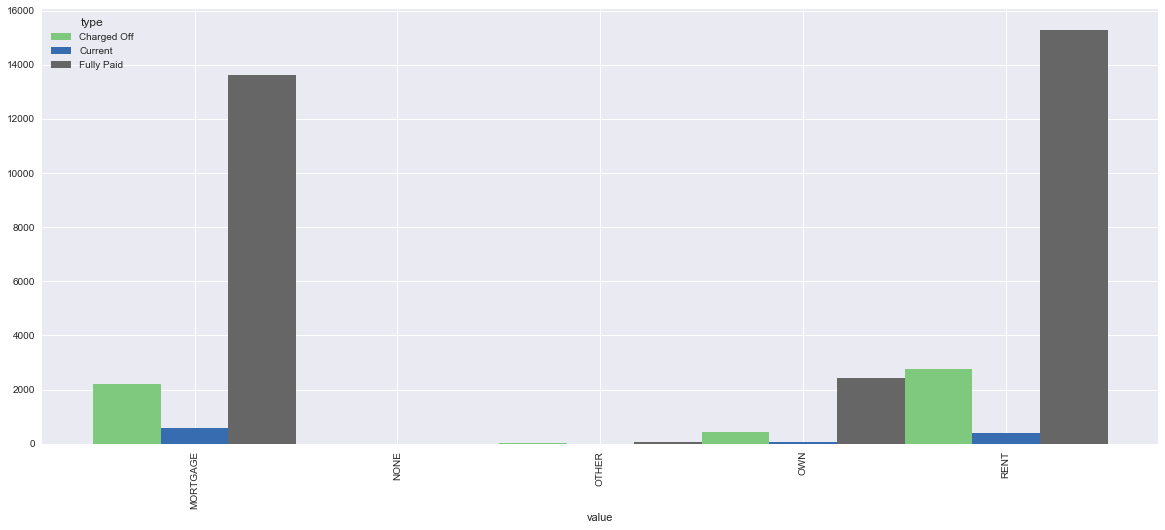

In [108]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['home_ownership'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,ax=ax)
plt.show()

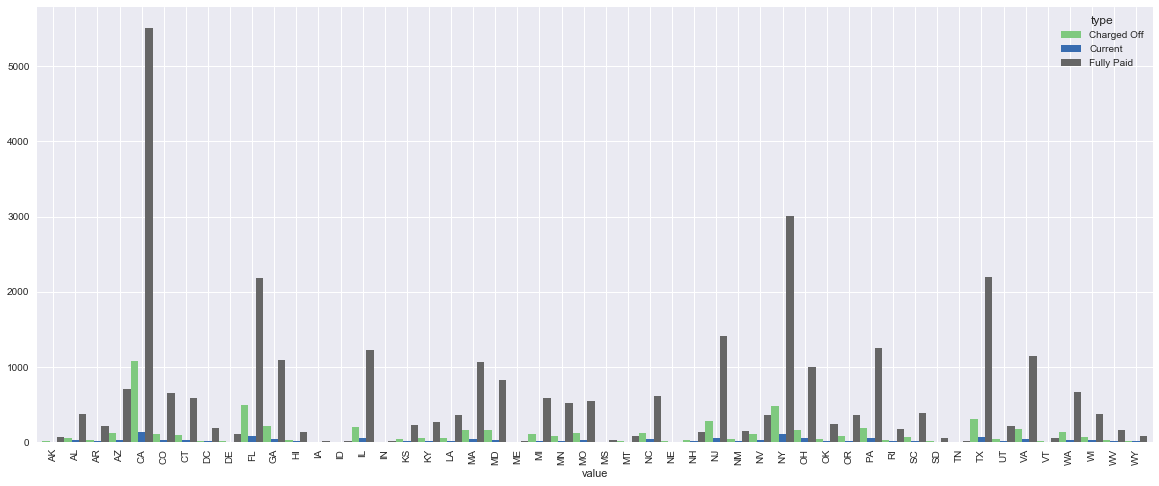

In [109]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['addr_state'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,ax=ax)
plt.show()

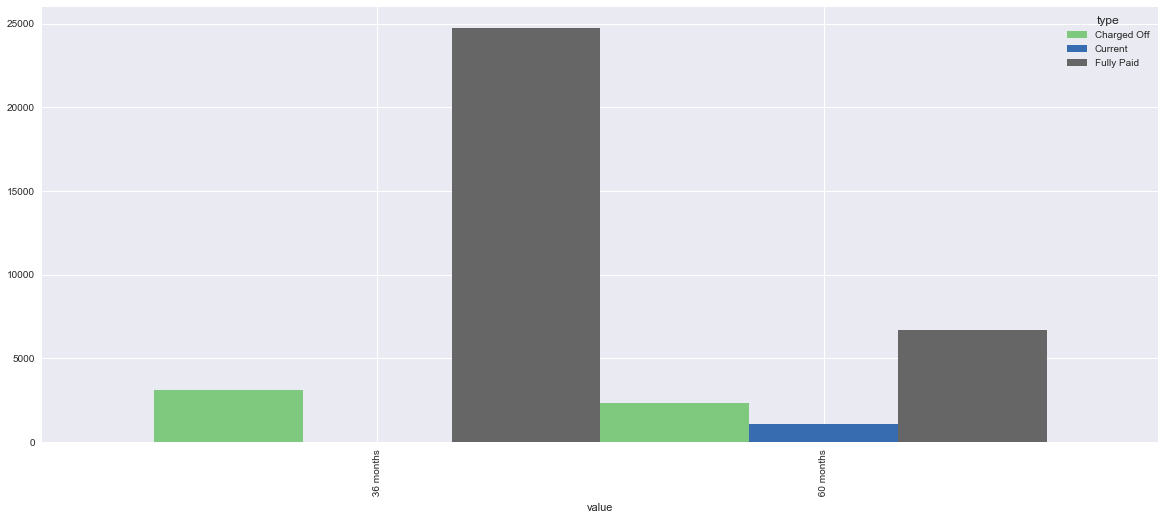

In [110]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['term'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,ax=ax)
plt.show()

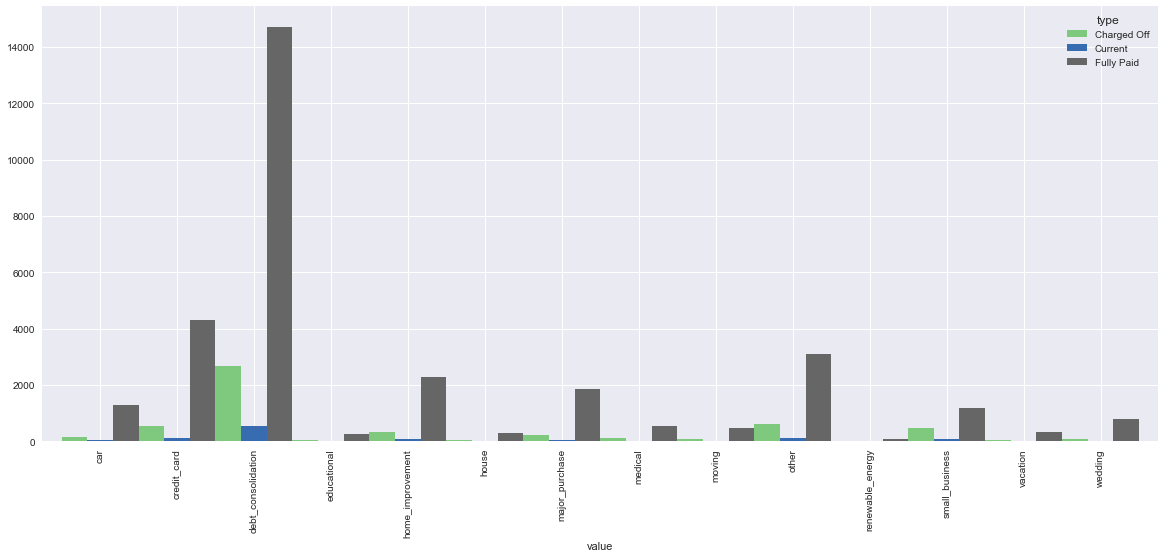

In [111]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['purpose'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width = 1,ax=ax)
plt.show()

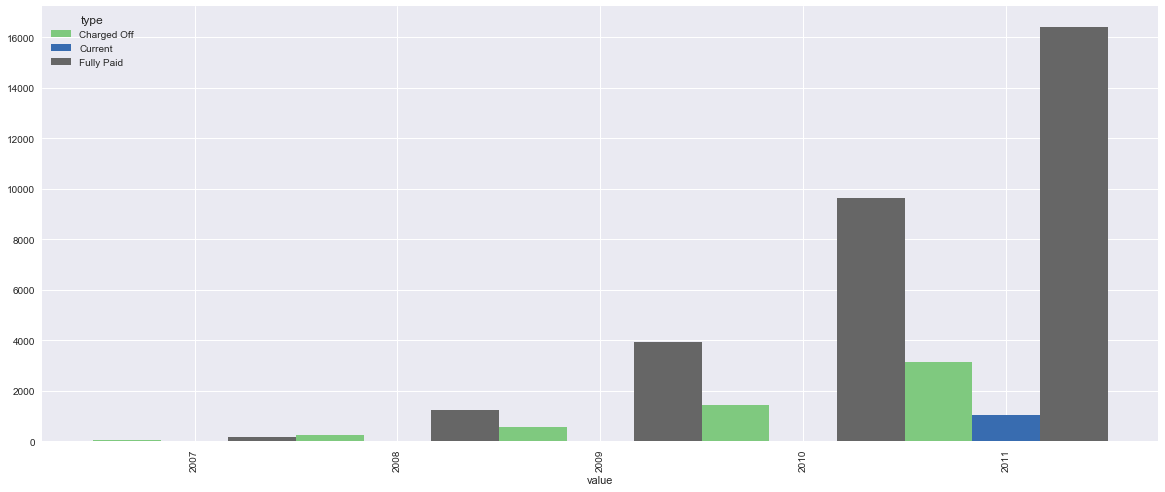

In [112]:
sns.set() #make the plots look pretty
df = pd.DataFrame({'value': loans['issued_year'], 'type': loans['loan_status']})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
fig, ax = plt.subplots(figsize=(20,8))
ag.plot(kind = 'bar', colormap = cm.Accent, width= 1,ax=ax)
plt.show()

In [113]:
### Let's do some Numerical data distribution and observe the results.
### Lets shrink our existing dataframe to keep only the floats and integers.
loans_num = loans.select_dtypes(include = ['float64', 'int64'])
### Also lets remove the id and member id as we do not need those
loans_num = loans_num.iloc[:,2:48]
loans_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,0.106,162.87,24000.0,27.65,0,1,0,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0
1,2500,2500,2500.0,0.153,59.83,30000.0,1.00,0,5,0,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0
2,2400,2400,2400.0,0.160,84.33,12252.0,8.72,0,2,0,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0
3,10000,10000,10000.0,0.135,339.31,49200.0,20.00,0,1,35,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0
4,3000,3000,3000.0,0.127,67.79,80000.0,17.94,0,0,38,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0


Populating the interactive namespace from numpy and matplotlib


C:\Users\kaust\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'bar']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


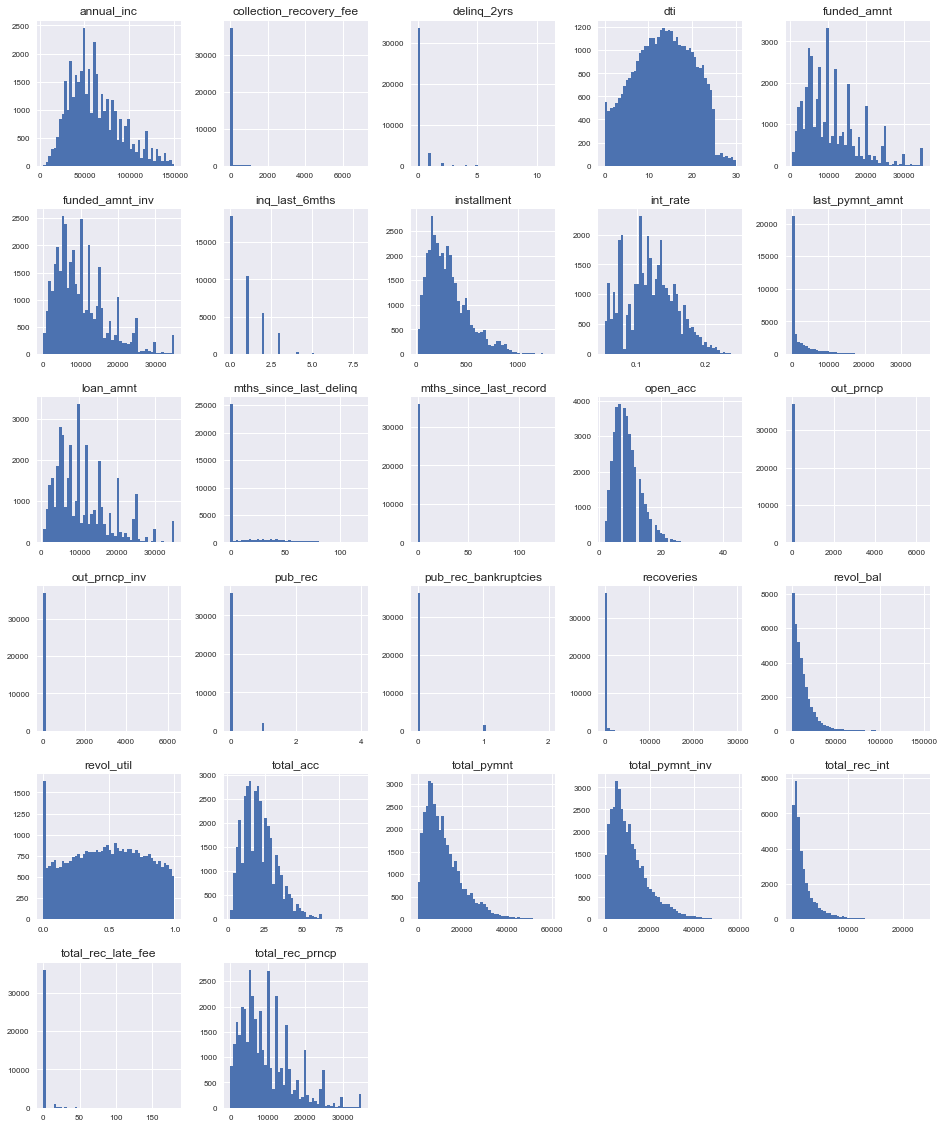

In [114]:
### Let's plot histogram for all
%pylab inline
loans_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Populating the interactive namespace from numpy and matplotlib


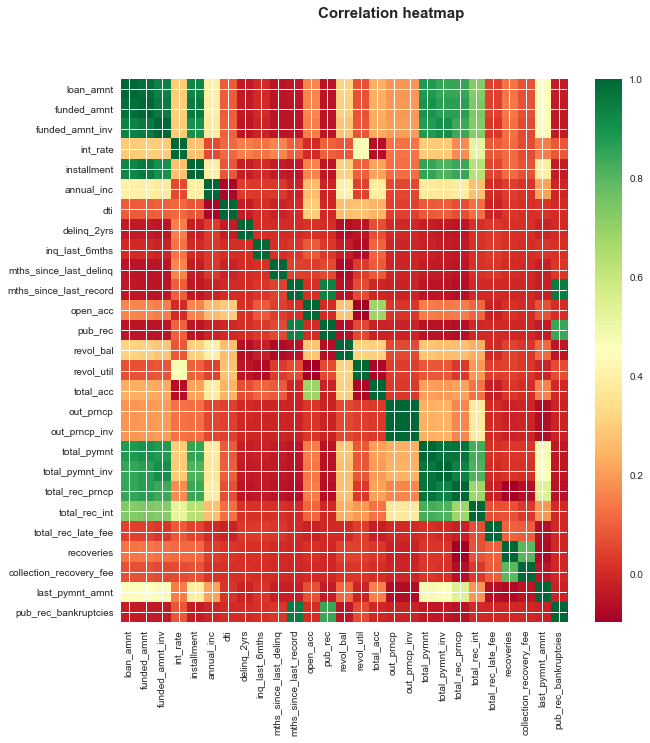

In [115]:
#### lets also plot some correlation matrixes and observe the trends
### Create a dataframe by removing id and member id
loans_cor= loans.iloc[:,2:50]
#Compute Correlation
corr = loans_cor.corr()

#Plot Correlation Matrix using Matplotlib
%pylab inline
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation heatmap', fontsize=15, fontweight='bold')
plt.show()

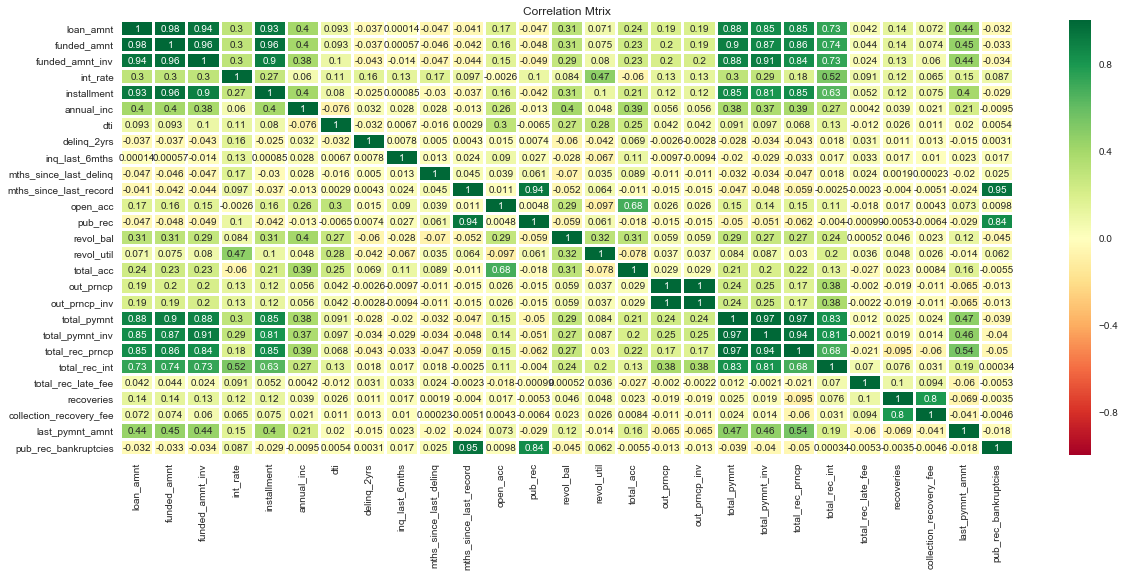

In [116]:
#### Lets also plot the correlation matrix and understand the relation
f, ax = plt.subplots(figsize=(20,8))
sns.heatmap(corr,linewidths=2.0, ax=ax , annot=True, cmap='RdYlGn')
ax.set_title('Correlation Mtrix')

### Inferences from the entire study:
#### All the above analysis done through graphs/plots suggest some intersting trends. We can conclude some suggestions to the LC - Lending Company using the above trends

### Suggestions

#### 1. As high loan segments have maximum % of defaults, the loan need strict verification before approving high amounts

#### 2.Number of unverified borrowers are very high, that need to be addressed as well as the % of  defaulters within the verification is high, so its need stricter verification

#### 3.Small business borrowers have high % of defaulters, so need to check the credit details before approval

#### 4.Debt-To-Income Ratio need to be checked strictly. Maximum defaulters have DTI income ratio of 15-20%. The ratio is calculated after removing the mortgage. The LC should take measures to issue loans with DTI of 15-20% to owners with mortgage. 

#### 5.Borrowers who are constantly having late payment issue are the indication of defaulter

#### 6.Revolving balance and utilization should be checked before the approval as its directly influence the credit score of the borrowers
#### 7.Defaulters have high public record of bankruptcies. LC should not issue loans customers having high number of public record of bankruptcies.
